# Assignment 1: Building a Convolutional Autoencoder

## Objective
In this assignment, you will build a convolutional autoencoder to encode and decode images using convolutional and transposed convolutional layers. You will work with the MNIST dataset, composed of 28x28 grayscale images of handwritten digits.

## Learning Outcomes
- Understand convolutional autoencoder architectures.
- Implement convolutional and transposed convolutional layers using TensorFlow.
- Preprocess image data to be compatible with convolutional layers.
- Train a convolutional autoencoder and evaluate image reconstruction quality.

## Instructions

### Part 1: Setup and Data Preprocessing
- Import the TensorFlow and Keras libraries and the MNIST dataset.
- Preprocess the dataset by normalizing and reshaping the data.

### Part 2: Building the Convolutional Autoencoder
- Construct the encoder using convolutional layers and max pooling.
- Build the decoder using transposed convolutional layers (UpSampling2D and Conv2D).
- Define the autoencoder model input and output.

### Part 3: Compiling and Training the Autoencoder
- Compile the autoencoder model with an appropriate optimizer and loss function.
- Train the autoencoder using the training dataset and validate it using the test dataset.

### Part 4: Evaluating the Model
- Plot training and validation loss curves.
- Visualize original and reconstructed images from the test set.



In [11]:
# Part 1: Setup and Data Preprocessing
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, Reshape, BatchNormalization, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# TODO: Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# TODO: Preprocess the dataset by normalizing and reshaping the data
# Hint: Normalize the images to the range [0, 1]

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Expand the dimensions of the images to be (28, 28, 1)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)


In [12]:
# Part 2: Building the Convolutional Autoencoder
input_img = Input(shape=(28, 28, 1))  # MNIST images size

# TODO: Encoder
# Hint: Use Conv2D and MaxPooling2D layers
encoder = Conv2D(16, (3, 3), padding='same')(input_img)
encoder = BatchNormalization()(encoder)
encoder = Activation('relu')(encoder)
encoder = MaxPooling2D((2, 2), padding='same')(encoder)
encoder = Conv2D(8, (3, 3), padding='same')(encoder)
encoder = BatchNormalization()(encoder)
encoder = Activation('relu')(encoder)
encoder = MaxPooling2D((2, 2), padding='same')(encoder)
encoder = Conv2D(8, (3, 3), padding='same')(encoder)
encoder = BatchNormalization()(encoder)
encoder = Activation('relu')(encoder)
encoded = MaxPooling2D((2, 2), padding='same')(encoder)


# TODO: Decoder
# Hint: Use Conv2DTranspose or a combination of UpSampling2D and Conv2D layers
decoder = Conv2D(8, (3, 3), padding='same')(encoded)
decoder = BatchNormalization()(decoder)
decoder = Activation('relu')(decoder)
decoder = UpSampling2D((2, 2))(decoder)
decoder = Conv2D(8, (3, 3), padding='same')(decoder)
decoder = BatchNormalization()(decoder)
decoder = Activation('relu')(decoder)
decoder = UpSampling2D((2, 2))(decoder)
decoder = Conv2D(16, (3, 3))(decoder)
decoder = BatchNormalization()(decoder)
decoder = Activation('relu')(decoder)
decoder = UpSampling2D((2, 2))(decoder)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoder)

# TODO: Define the autoencoder model input and output
autoencoder = Model(inputs=input_img, outputs=decoded)


In [13]:
# Part 3: Compiling and Training the Autoencoder
# TODO: Compile the autoencoder model with an appropriate optimizer and loss function
# Hint: Use 'adam' optimizer and 'mean_squared_error' as loss function
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

# TODO: Train the autoencoder using the training dataset and validate it using the test dataset
# Hint: Use model.fit() and provide the training and validation data
autoencoder.fit(x_train, x_train, validation_data=(x_test, x_test), epochs=20, batch_size=32, shuffle=True)


Epoch 1/20
1875/1875 [==============================] - 37s 19ms/step - loss: 0.0265 - val_loss: 0.0159
Epoch 2/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0140 - val_loss: 0.0125
Epoch 3/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0120 - val_loss: 0.0111
Epoch 4/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0109 - val_loss: 0.0104
Epoch 5/20
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0103 - val_loss: 0.0096
Epoch 6/20
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0099 - val_loss: 0.0100
Epoch 7/20
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0096 - val_loss: 0.0097
Epoch 8/20
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0094 - val_loss: 0.0102
Epoch 9/20
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0092 - val_loss: 0.0091
Epoch 10/20
1875/1875 [==============================] - 39s 21m

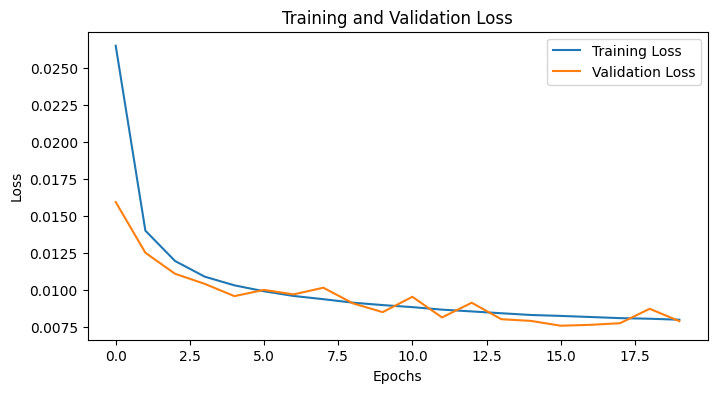

1/1 [==============================] - 0s 19ms/step


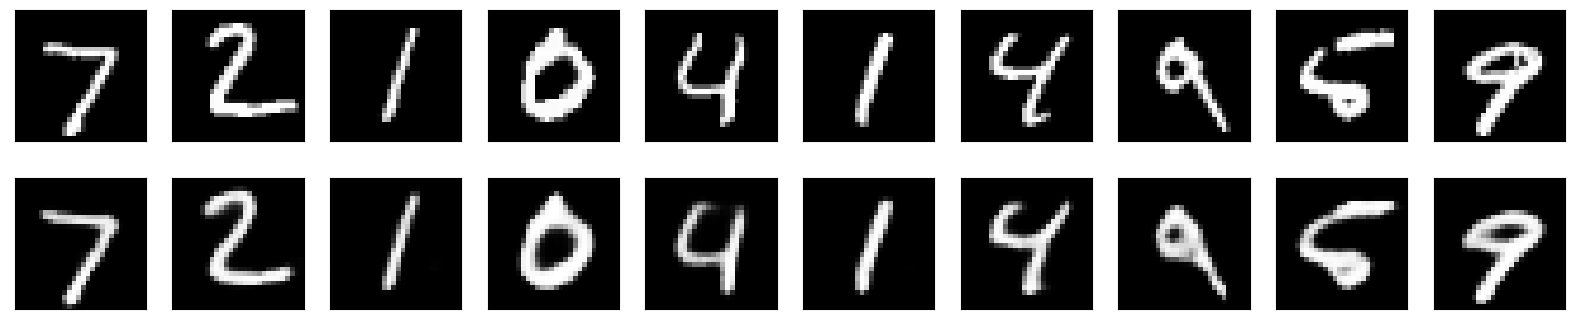

In [16]:
# Part 4: Evaluating the Model
# TODO: Plot training and validation loss curves
# Hint: Use plt.plot() to plot the 'loss' and 'val_loss'

plt.figure(figsize=(8, 4))
plt.plot(autoencoder.history.history['loss'], label='Training Loss')
plt.plot(autoencoder.history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



# TODO: Visualize original and reconstructed images from the test set
# Hint: Use the predict method on the autoencoder to get the reconstructed images
# Plot training and validation loss curves


n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    reconstructed_img = autoencoder.predict(x_test[i:i + 1])
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_img.reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()




---



---




# Assigment 2: Object Detection with RCNN

## Introduction
This assignment will guide you through the process of using a pre-trained RCNN model for object detection. You will learn how to perform selective search to propose candidate object bounding boxes and then use a trained RCNN to classify these proposals.

## Objective
Your task is to detect and classify objects in a given image using a pre-trained RCNN model and non-maximum suppression to filter out overlapping boxes.


###Import Libraries

In [5]:
#Import Libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential, load_model
from keras.applications.vgg16 import VGG16

## Exercise 1: Non-Maximum Suppression Function(NMS)

Non-Maximum Suppression (NMS) is an essential post-processing step in object detection algorithms. It addresses the problem of multiple bounding boxes being predicted for the same object by selecting the most accurate one.

### Function Input:
- `boxes`: A list of proposed bounding boxes, where each box is defined by its coordinates `[x1, y1, x2, y2]`.
- `overlapThresh`: The threshold for the Intersection over Union (IoU) metric. Boxes with IoU greater than this threshold will be suppressed.
- `probs`: A list of confidence scores for each bounding box.

### Function Output:
- A list of bounding boxes that have been filtered by NMS, where redundant boxes with lower confidence scores have been suppressed.

The NMS algorithm works by first sorting the bounding boxes by their confidence scores. It then iterates through the sorted list, keeping a box if it doesn't have significant overlap with a previously selected box, measured by IoU. If it does overlap significantly, the box is suppressed. This process continues until all boxes have been considered.

Here is a template for the `non_max_suppression_fast` function with `TODO` parts that need to be implemented.


In [6]:
def non_max_suppression_fast(boxes, overlapThresh, probs=None):
    # If there are no boxes, return an empty list
    if len(boxes) == 0:
        return []

    # Initialize the list of picked indexes
    pick = []

    # Grab the coordinates of the bounding boxes
    x1 = boxes[:,0]
    y1 = boxes[:,1]
    x2 = boxes[:,2]
    y2 = boxes[:,3]

    # Compute the area of the bounding boxes and sort the bounding
    # boxes by the bottom-right y-coordinate of the bounding box
    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(y2)

    # Keep looping while some indexes still remain in the indexes list
    while len(idxs) > 0:
        # Grab the last index in the indexes list and add the
        # index value to the list of picked indexes
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)

        # Find the largest (x, y) coordinates for the start of
        # the bounding box and the smallest (x, y) coordinates
        # for the end of the bounding box
        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])

        # Compute the width and height of the bounding box
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)

        # Compute the ratio of overlap
        overlap = (w * h) / area[idxs[:last]]

        # Delete all indexes from the index list that have
        idxs = np.delete(idxs, np.concatenate(([last], np.where(overlap > overlapThresh)[0])))

    # Return only the bounding boxes that were picked using the integer data type
    return boxes[pick].astype("int")


## Exercise 2: R-CNN Function

The `rcnn` function serves as the core of our object detection algorithm.

### Function Input:
- `image`: The image in which we want to detect objects. It should be read as a NumPy array in BGR format, which is standard for OpenCV.

### Function Output:
- `cleaned_boxes`: A list of bounding boxes after applying Non-Maximum Suppression. Each bounding box is represented as a list of coordinates `[x1, y1, x2, y2]`.
- The function will also display the image with detected objects outlined with bounding boxes.


In [18]:
import cv2
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array

def rcnn(image):
    
    # TODO: Load the pre-trained VGG16 model for feature extraction
    model = VGG16(weights='imagenet') # Load the pre-trained VGG16 model for classification

    
    # TODO: Initialize selective search and generate region proposals
    # Hint: Use `cv2.ximgproc.segmentation.createSelectiveSearchSegmentation`
    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
    ss.setBaseImage(image)
    ss.switchToSelectiveSearchFast()
    rects = ss.process()

    # Initialize lists to store the positive detections and their corresponding probabilities
    positive_boxes = []
    probs = []

    # TODO: Iterate over each region proposal and preprocess them for the VGG16 model
    for (x, y, w, h) in rects:
        # Preprocess the region proposal for the VGG16 model
        roi = image[y:y+h, x:x+w]
        roi = cv2.resize(roi, (224, 224))
        roi = img_to_array(roi)
        roi = preprocess_input(roi)
        roi = np.expand_dims(roi, axis=0)

        # TODO: Use the base_model to extract features and then classify each region proposal
        # Classify the region proposal
        pred = model.predict(roi)
        class_id = np.argmax(pred)
        class_prob = pred[0][class_id]

        # TODO: Apply a threshold to filter out low-probability detections
        
        if class_prob > 0.7:  # Example threshold
            positive_boxes.append((x, y, x+w, y+h))
            probs.append(class_prob)

    # TODO: Call the Non-Maximum Suppression function to filter overlapping boxes

    indices = cv2.dnn.NMSBoxes(positive_boxes, probs, 0.7, 0.3)

    # Handle indices format returned by NMSBoxes
    if len(indices) > 0 and isinstance(indices[0], (list, np.ndarray)):
        cleaned_boxes = [positive_boxes[i[0]] for i in indices]
    else:
        cleaned_boxes = [positive_boxes[i] for i in indices]

    
    # TODO: Draw the final bounding boxes on the image
    for box in cleaned_boxes:
        start_x, start_y, end_x, end_y = box
        cv2.rectangle(image, (start_x, start_y), (end_x, end_y), (0, 255, 0), 2)

    
    # TODO: Display the image with bounding boxes
    cv2.imshow("Image with Bounding Boxes", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Return the list of cleaned bounding boxes
    return cleaned_boxes


In [19]:
test_img = cv2.imread('/home/mehrab/Mehrab/cs/ai_uni/many_plates.jpg')
rcnn(image=test_img)

1/1 [==============================] - 0s 130ms/step


[(541, 0, 615, 35),
 (211, 47, 505, 156),
 (3, 237, 112, 259),
 (405, 427, 426, 477),
 (70, 183, 128, 192),
 (601, 275, 617, 319),
 (530, 101, 640, 102),
 (124, 375, 184, 386),
 (0, 0, 261, 274),
 (211, 37, 640, 477)]

#  Assignment 3: Semantic Segmentation with Fully Convolutional Network (FCN)

## Objective
Implement a Fully Convolutional Network (FCN) to perform semantic segmentation on the PASCAL VOC dataset.

## Instructions
### Part 1: Dataset Preparation
- Download and preprocess the PASCAL VOC dataset.
- Normalize the images and convert the segmentation masks to categorical format.

### Part 2: FCN Model Architecture
- Construct an FCN model with the following specifications:
  - Input layer accepting images of size 224x224x3
  - Block 1: 2 convolutional layers with 64 filters of size 3x3, 'relu' activation, followed by a max-pooling layer of size 2x2
  - Block 2: 2 convolutional layers with 128 filters of size 3x3, 'relu' activation, followed by a max-pooling layer of size 2x2
  - Block 3: 3 convolutional layers with 256 filters of size 3x3, 'relu' activation, followed by a max-pooling layer of size 2x2
  - Block 4: 3 convolutional layers with 512 filters of size 3x3, 'relu' activation, followed by a max-pooling layer of size 2x2
  - Block 5: 3 convolutional layers with 512 filters of size 3x3, 'relu' activation, followed by a max-pooling layer of size 2x2
  - Convolutional layers to replace fully connected layers with 4096 filters of size 1x1, 'relu' activation
  - Transposed convolution (deconvolution) layers to upsample the feature maps back to the original image size
  - Skip connections from blocks 3, 4, and 5 to corresponding transposed convolution layers
  - Output layer with a 1x1 convolution to predict the class for each pixel

### Part 3: Model Training
- Compile the model with an appropriate optimizer and loss function.
- Train the model on the training set and validate on the validation set.
- Save the trained model.

### Part 4: Model Evaluation
- Evaluate the model on the test set using Intersection over Union (IoU) as the metric.
- Visualize the predicted segmentation masks

In [21]:
import tensorflow_datasets as tfds
import tensorflow as tf

# Load the Oxford-IIIT Pet dataset
dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True, split=['train', 'test'])

# Dataset splits
train_dataset, test_dataset = dataset

# Inspect the dataset structure
for example in train_dataset.take(1):
    print(list(example.keys()))

# Function to preprocess images and masks
def preprocess(image, mask):
    # Resize image and mask
    image = tf.image.resize(image, (128, 128))  # Smaller size for efficiency
    mask = tf.image.resize(mask, (128, 128), method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

    # Normalize the image
    image = tf.cast(image, tf.float32) / 255.0

    # The mask contains [1, 2, 3], mapping them to [0, 1, 2]
    mask -= 1

    return image, mask

# Apply the preprocessing function to the datasets
train_dataset = train_dataset.map(lambda x: preprocess(x['image'], x['segmentation_mask']))
test_dataset = test_dataset.map(lambda x: preprocess(x['image'], x['segmentation_mask']))

# Batch and prefetch for performance
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


['file_name', 'image', 'label', 'segmentation_mask', 'species']
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [22]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate
from tensorflow.keras.models import Model

def fcn_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # Block 1
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D((2, 2))(conv1)

    # Block 2
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D((2, 2))(conv2)

    # Block 3
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D((2, 2))(conv3)

    # Block 4
    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv4)
    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D((2, 2))(conv4)

    # Block 5
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)
    pool5 = MaxPooling2D((2, 2))(conv5)

    # Convolutional layers to replace fully connected layers
    conv6 = Conv2D(4096, (1, 1), activation='relu', padding='same')(pool5)
    conv7 = Conv2D(4096, (1, 1), activation='relu', padding='same')(conv6)

    # Upsampling Block 1
    deconv1 = Conv2DTranspose(num_classes, (4, 4), strides=(2, 2), padding='same')(conv7)

    # Upsampling Block 2
    deconv2 = Conv2DTranspose(num_classes, (4, 4), strides=(2, 2), padding='same')(deconv1)
    # Adjust the shape to match conv3's shape
    deconv2 = Conv2DTranspose(num_classes, (4, 4), strides=(2, 2), padding='same')(deconv2)
    skip2 = concatenate([deconv2, conv3], axis=3)

    # Upsampling Block 3
    deconv3 = Conv2DTranspose(num_classes, (16, 16), strides=(4, 4), padding='same')(skip2)  # Example adjustment

    model = Model(inputs=inputs, outputs=deconv3)
    return model

# Define the input shape and number of classes for your dataset
input_shape = (128, 128, 3)  # Adjusted for the smaller image size
num_classes = 3  # Adjust as per your dataset's class count

# Instantiate the FCN model
fcn = fcn_model(input_shape, num_classes)

# Print model summary
fcn.summary()


Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_129 (Conv2D)            (None, 128, 128, 64  1792        ['input_11[0][0]']               
                                )                                                                 
                                                                                                  
 conv2d_130 (Conv2D)            (None, 128, 128, 64  36928       ['conv2d_129[0][0]']             
                                )                                                           

In [24]:
fcn.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train the model
history = fcn.fit(
    train_dataset,
    epochs=5,
    validation_data=test_dataset,
    verbose=1
)

# Model summary
fcn.summary()

Epoch 1/5
 14/115 [==>...........................] - ETA: 10:14 - loss: 0.9001 - accuracy: 0.6722

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


115/115 [==============================] - 847s 7s/step - loss: 0.7057 - accuracy: 0.7198 - val_loss: 0.8600 - val_accuracy: 0.6697
Epoch 2/5
 14/115 [==>...........................] - ETA: 10:29 - loss: 0.6878 - accuracy: 0.7181

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


115/115 [==============================] - 848s 7s/step - loss: 0.5935 - accuracy: 0.7613 - val_loss: 0.5689 - val_accuracy: 0.7690
Epoch 3/5
 14/115 [==>...........................] - ETA: 10:31 - loss: 0.5333 - accuracy: 0.7895

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


115/115 [==============================] - 852s 7s/step - loss: 0.5079 - accuracy: 0.7997 - val_loss: 0.5062 - val_accuracy: 0.7996
Epoch 4/5
 14/115 [==>...........................] - ETA: 10:21 - loss: 0.5120 - accuracy: 0.7964

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


115/115 [==============================] - 854s 7s/step - loss: 0.4643 - accuracy: 0.8181 - val_loss: 0.4671 - val_accuracy: 0.8149
Epoch 5/5
 14/115 [==>...........................] - ETA: 10:32 - loss: 0.4481 - accuracy: 0.8224

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


115/115 [==============================] - 856s 7s/step - loss: 0.4359 - accuracy: 0.8299 - val_loss: 0.4244 - val_accuracy: 0.8366
Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_129 (Conv2D)            (None, 128, 128, 64  1792        ['input_11[0][0]']               
                                )                                                                 
                                                                                                  
 conv2d_130 (Conv2D)            (None, 128, 128, 64  36928 

115/115 [==============================] - 110s 956ms/step - loss: 0.4244 - accuracy: 0.8366
Test Loss: 0.42439591884613037
Test Accuracy: 0.836577296257019
1/1 [==============================] - 1s 1s/step


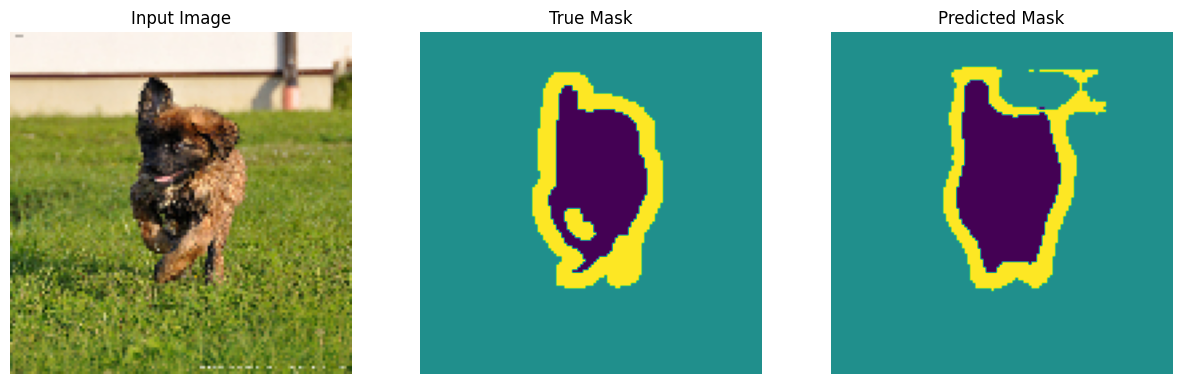

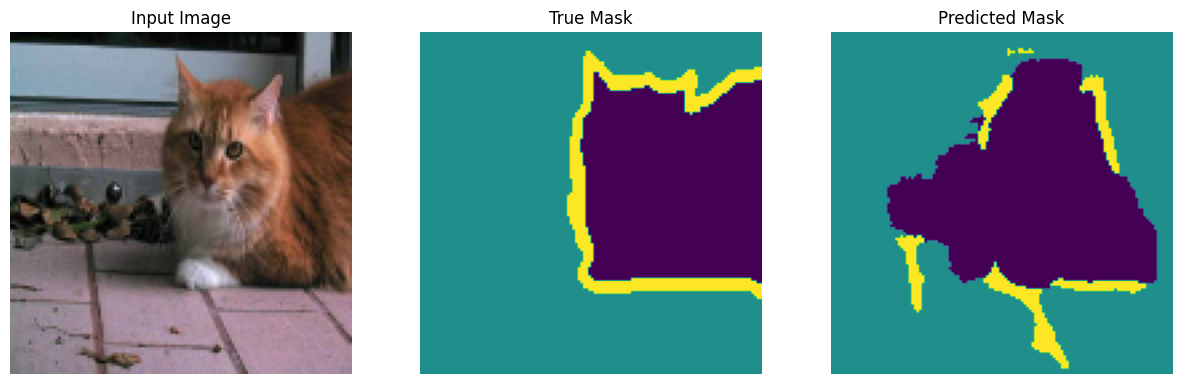

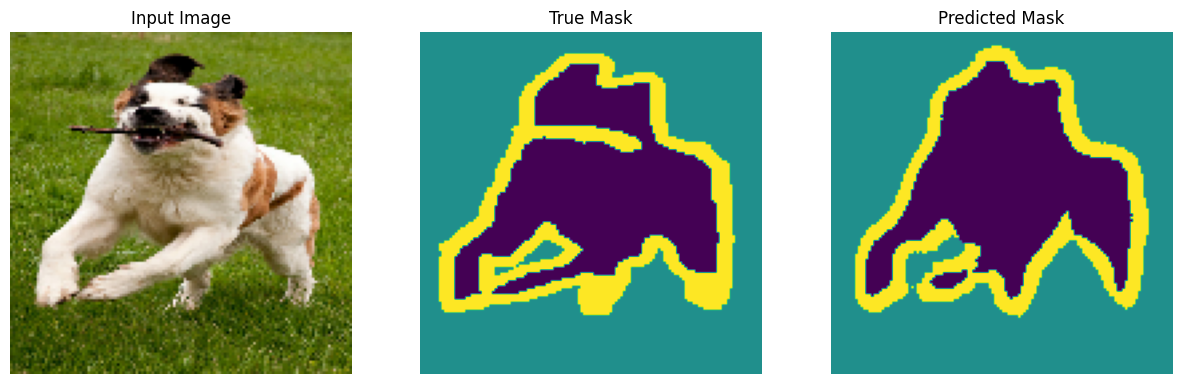

1/1 [==============================] - 1s 1s/step


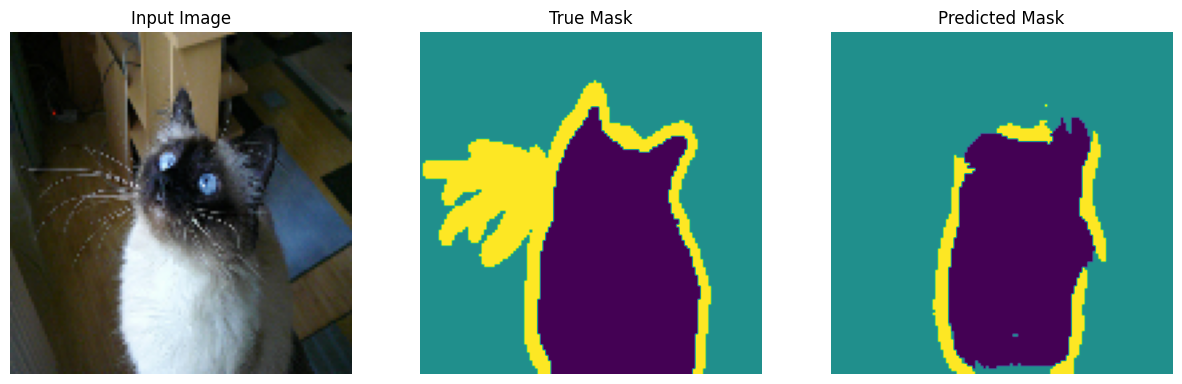

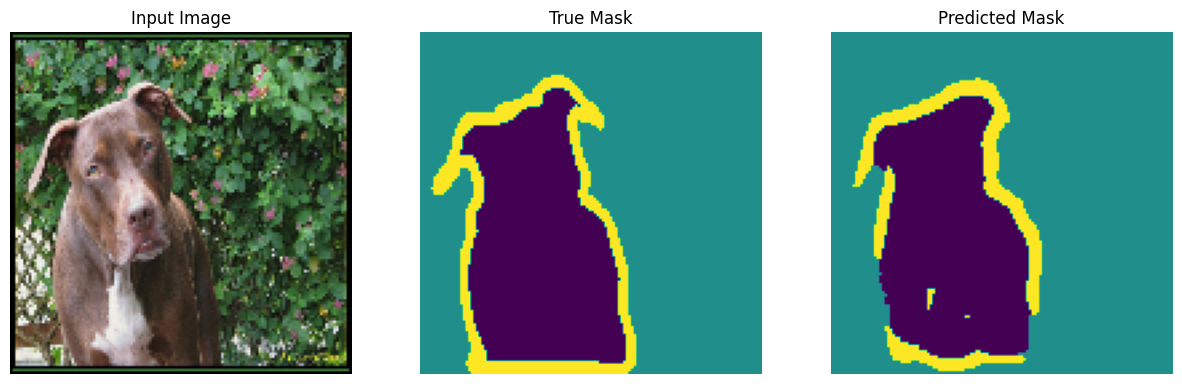

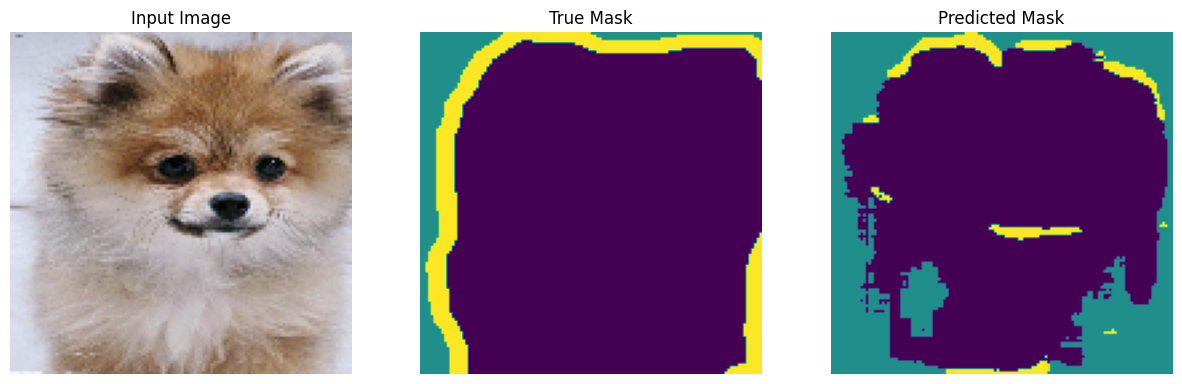

1/1 [==============================] - 1s 1s/step


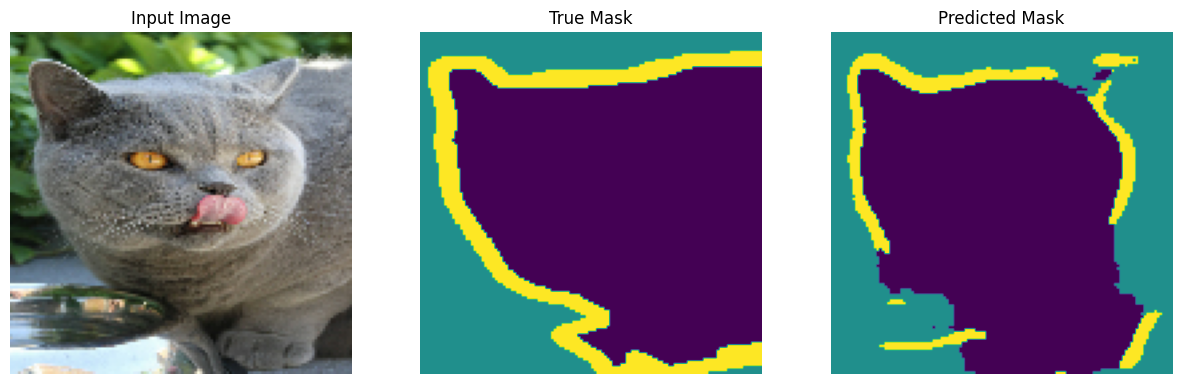

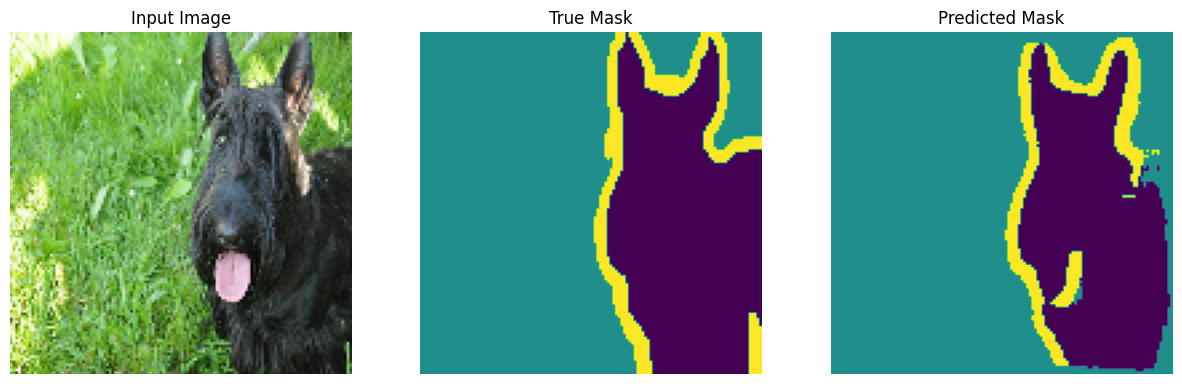

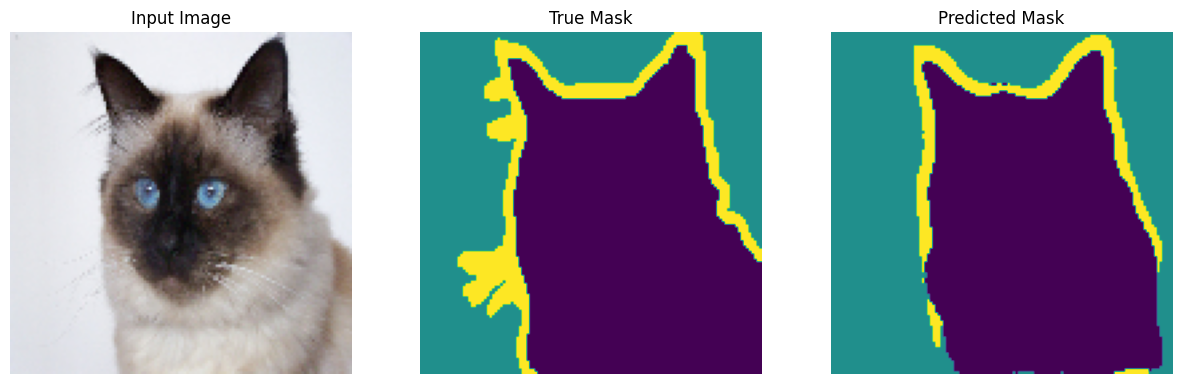

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


# Evaluate the model on the test set
test_loss, test_accuracy = fcn.evaluate(test_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Function to display images
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

# Visualize the predictions
for images, masks in test_dataset.take(3):
    # Predict the segmentation masks
    preds = fcn.predict(images)
    preds = tf.argmax(preds, axis=-1)
    preds = preds[..., tf.newaxis]

    for i in range(3): # Display 3 images from each batch
        display([images[i], masks[i], preds[i]])
